####Step 1: Import Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


###Step 2: Load and Explore the Dataset


In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Display dataset information
print("Features:", data.feature_names)
print("Class Labels:", data.target_names)
print("Data Shape:", X.shape)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class Labels: ['malignant' 'benign']
Data Shape: (569, 30)


###Step 3: Preprocess the Data


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-7-af298aee92e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['#FF6347', '#4682B4'])


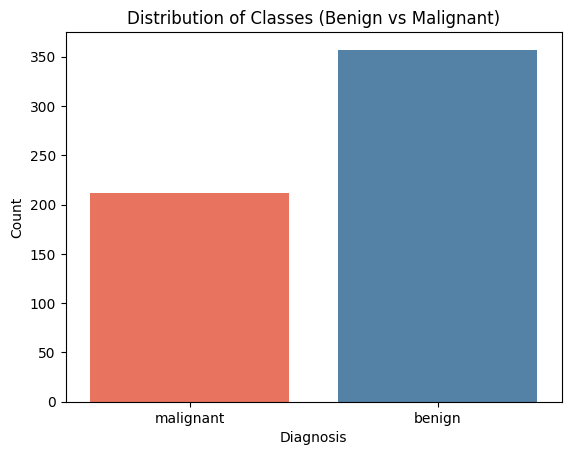

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset into a DataFrame for easier manipulation
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualize class distribution
sns.countplot(x='target', data=df, palette=['#FF6347', '#4682B4'])
plt.xticks([0, 1], data.target_names)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Classes (Benign vs Malignant)")
plt.show()


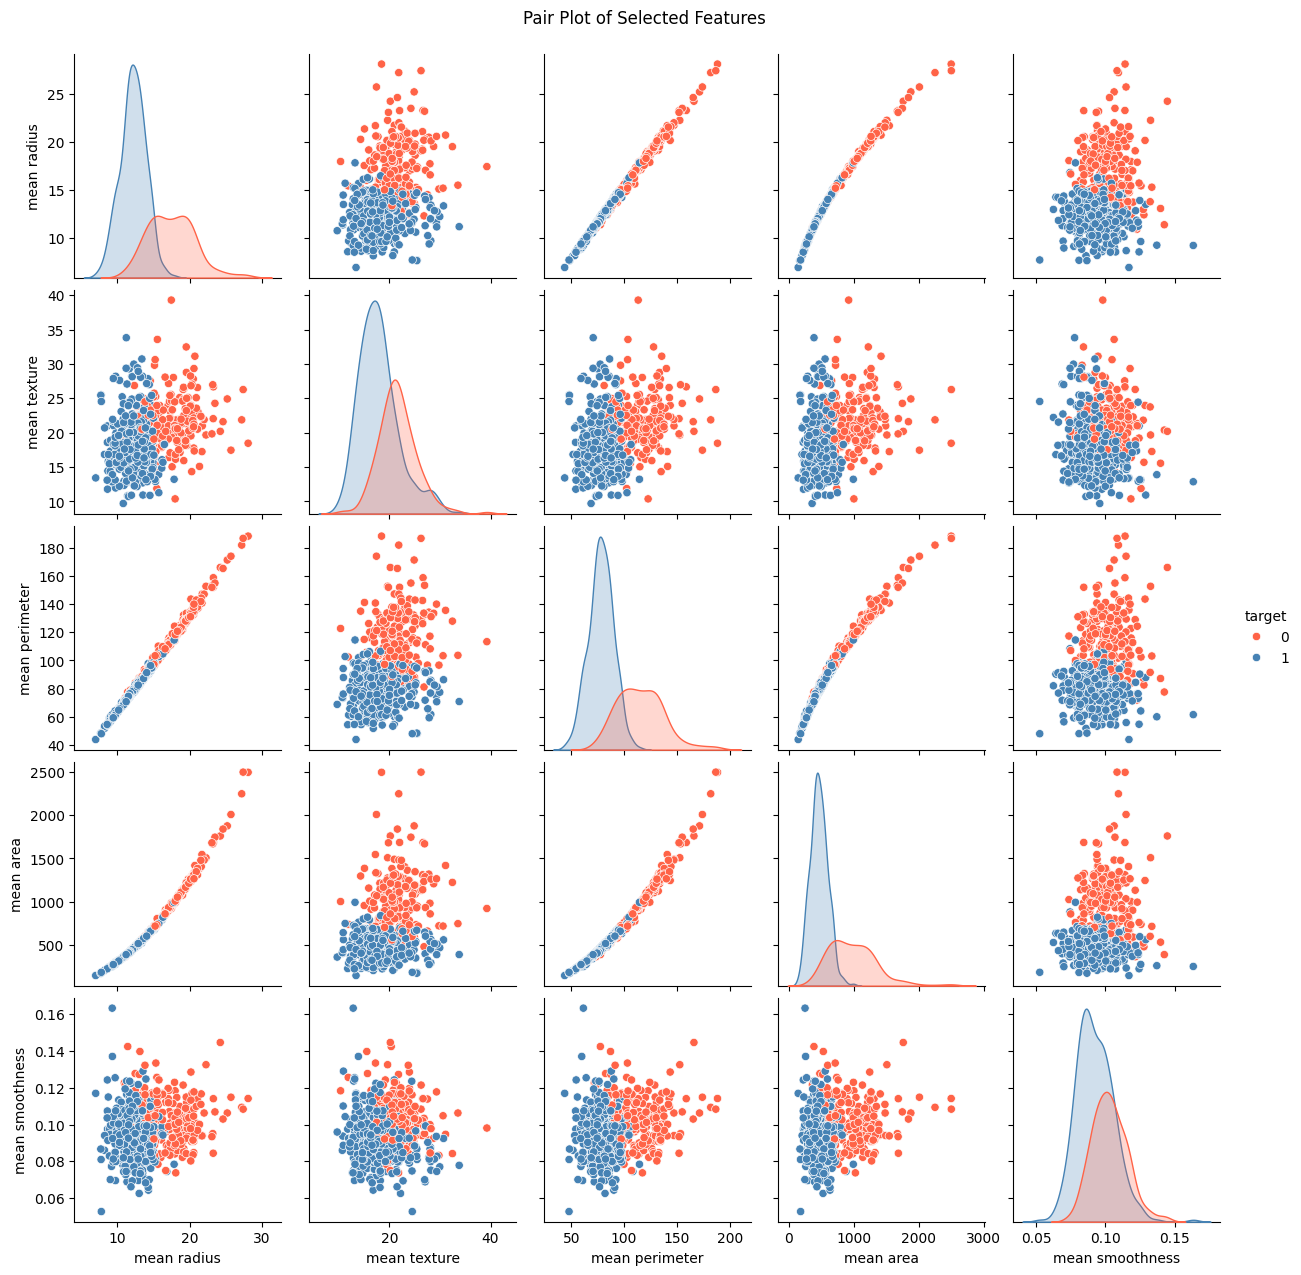

In [8]:
# Select a subset of features for pair plotting
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df_subset = df[features + ['target']]

# Create pair plot
sns.pairplot(df_subset, hue='target', palette={0: '#FF6347', 1: '#4682B4'})
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


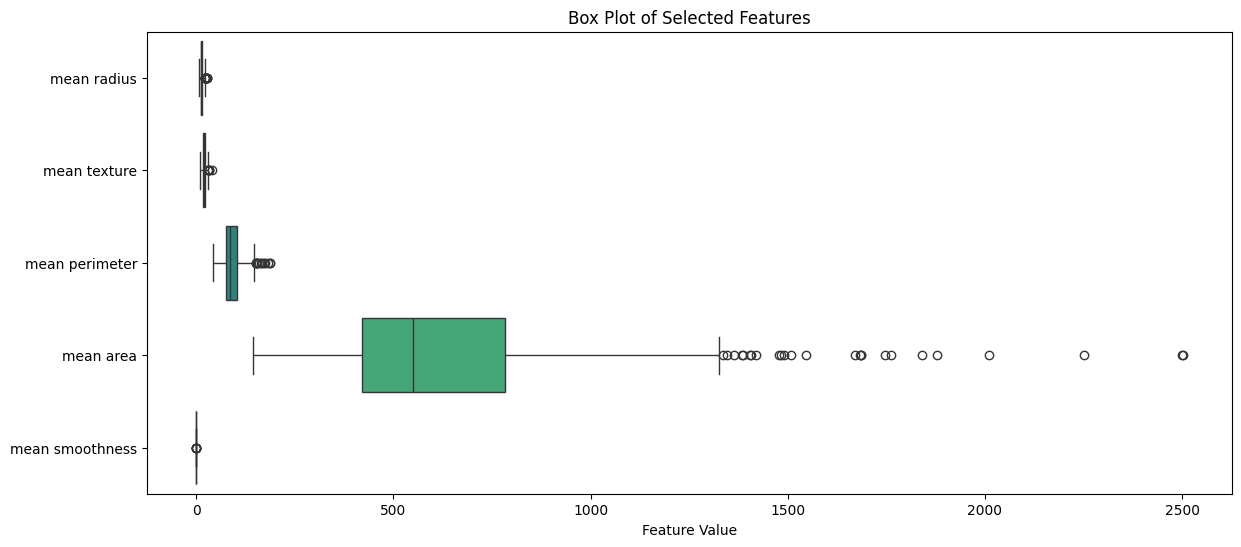

In [9]:
# Box plot of features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features], orient='h', palette='viridis')
plt.title("Box Plot of Selected Features")
plt.xlabel("Feature Value")
plt.show()


##Step 4: Implement k-Nearest Neighbors (k-NN) Classifier


In [4]:
# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using k-fold cross-validation
knn_scores = cross_val_score(knn, X_train, y_train, cv=10)
print("k-NN Cross-Validation Accuracy:", knn_scores.mean())

# Train and test the model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (k-NN):\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix (k-NN):\n", confusion_matrix(y_test, y_pred_knn))


k-NN Cross-Validation Accuracy: 0.9669565217391304
k-NN Test Accuracy: 0.9473684210526315

Classification Report (k-NN):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix (k-NN):
 [[40  3]
 [ 3 68]]


##Step 5: Implement Decision Tree Classifier


In [5]:
# Initialize Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Train the model using k-fold cross-validation
tree_scores = cross_val_score(tree, X_train, y_train, cv=10)
print("Decision Tree Cross-Validation Accuracy:", tree_scores.mean())

# Train and test the model
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Cross-Validation Accuracy: 0.9297584541062802
Decision Tree Test Accuracy: 0.9473684210526315

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix (Decision Tree):
 [[40  3]
 [ 3 68]]


##step 6: Visualize Results


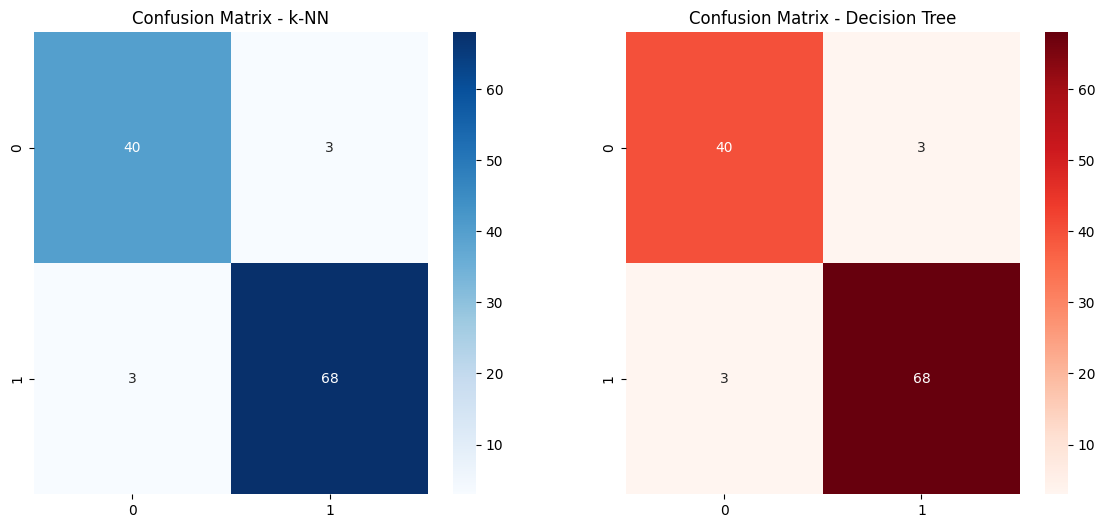

In [6]:
# Plot confusion matrix for k-NN
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - k-NN")

# Plot confusion matrix for Decision Tree
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Decision Tree")

plt.show()


##Step 7: Analysis and Evaluation


You can analyze the classification reports and confusion matrices to see which model performs better on the breast cancer dataset.



Summary
This code covers the full ML pipeline for breast cancer prediction using k-NN and Decision Tree classifiers, including data preprocessing, cross-validation, training, testing, and evaluation. Both models are evaluated using cross-validation and tested for accuracy, making this approach more robust against overfitting.






